In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('User_Data.csv')

In [6]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
standard=StandardScaler()
x_train=standard.fit_transform(x_train)
x_test=standard.transform(x_test)

In [14]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifire=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifire.fit(x_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred=classifire.predict(x_test)

In [19]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [20]:
from sklearn.metrics import confusion_matrix
con_met=confusion_matrix(y_test,y_pred)

In [21]:
con_met

array([[64,  4],
       [ 3, 29]])

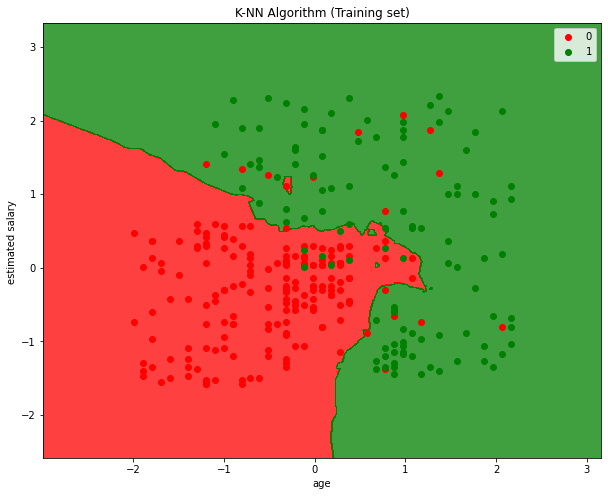

In [36]:
from matplotlib.colors import ListedColormap
x_set=x_train
y_set=y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.figure(figsize=(10, 8))
plt.contourf(x1, x2, classifire.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label=j)

plt.title("K-NN Algorithm (Training set)")
plt.xlabel("age")
plt.ylabel('estimated salary ')
plt.legend()

plt.show()

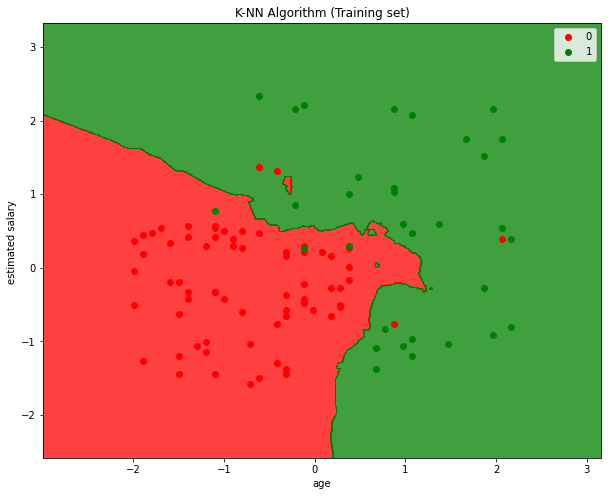

In [40]:
from matplotlib.colors import ListedColormap
x_set=x_test
y_set=y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)) 
plt.figure(figsize=(10, 8)) 
plt.contourf(x1, x2, classifire.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label=j)

plt.title("K-NN Algorithm (Training set)")
plt.xlabel("age")
plt.ylabel('estimated salary ')
plt.legend()
plt.show()